In [11]:
from striped.job import SinglePointStripedSession as Session, IPythonDisplay

from histbook import Hist, beside, groupby, below
from histbook import bin as hbin

job_server = ("dbwebdev.fnal.gov", 8765)
#job_server = ("ifdb01.fnal.gov", 8765)

In [15]:
#__worker_class__

import numpy as np, math

class Worker(object):

    Columns = ["ALPHAWIN_J2000","DELTAWIN_J2000","Observation.ALPHAWIN_J2000","Observation.DELTAWIN_J2000"]

    def dist_arr(self, ra1, dec1, ra2, dec2):
        return np.maximum(np.abs(ra1-ra2), np.abs(dec1-dec2))

    def dist(self, a1, d1, a2, d2):
        a1 = a1*math.pi/180.0
        a2 = a2*math.pi/180.0
        d1 = d1*math.pi/180.0
        d2 = d2*math.pi/180.0
        d = np.sin(d1)*np.sin(d2) + np.cos(d1)*np.cos(d2)*np.cos(a1-a2)
        d = np.clip(d, -1.0, 1.0)
        print min(d), max(d)
        return np.arccos(d)*180.0/math.pi
    
    def run(self, objects, job):
        
        obs = objects.Observation
        
        job.fill(obs_count = obs.count)
        
        obj_ra = obs.expand(objects.ALPHAWIN_J2000)
        obj_dec = obs.expand(objects.DELTAWIN_J2000)
        obs_ra = obs.ALPHAWIN_J2000
        obs_dec = obs.DELTAWIN_J2000
        dist = self.dist(obs_ra, obs_dec, obj_ra, obj_dec)
        job.fill(obs_dist=dist*3600.0) 
        
        

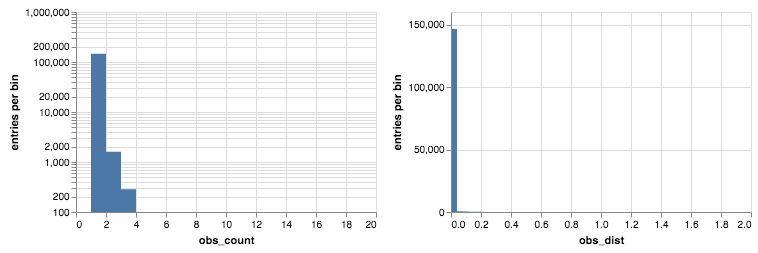

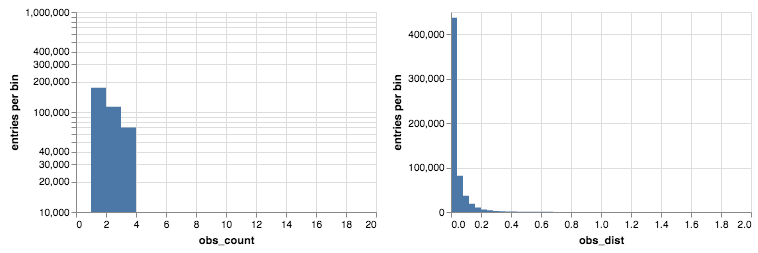

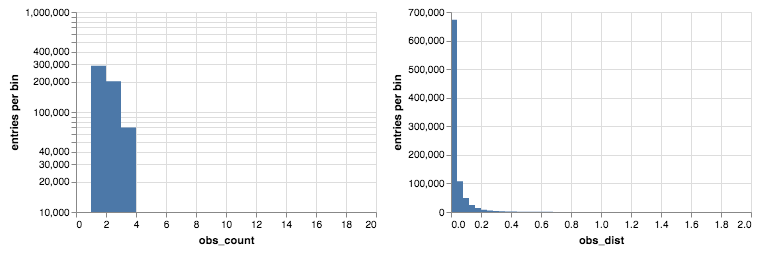

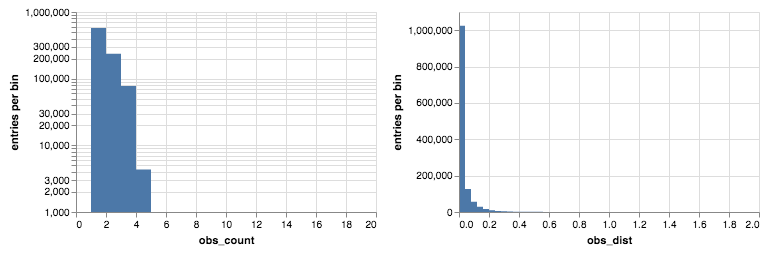

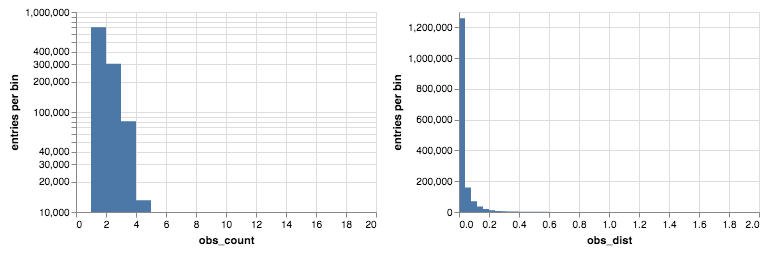

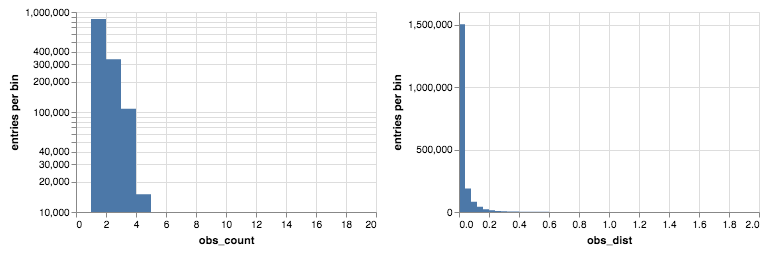

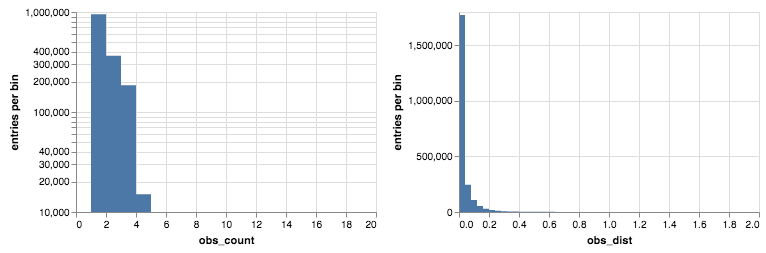

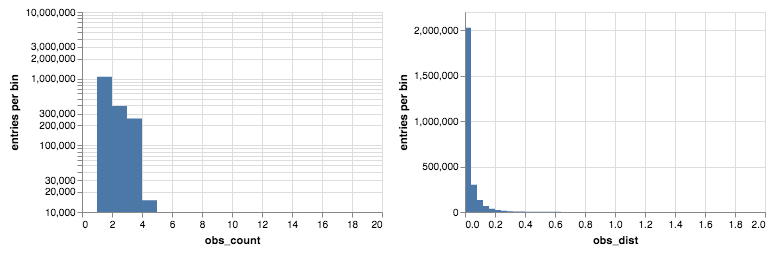

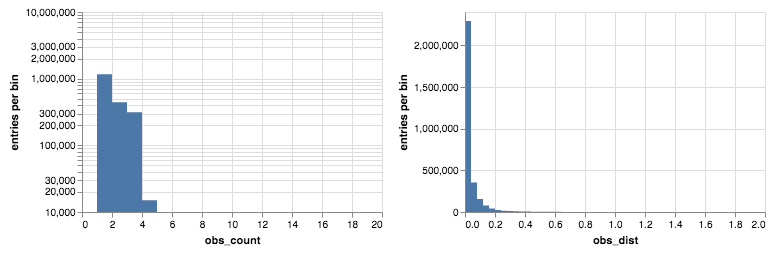

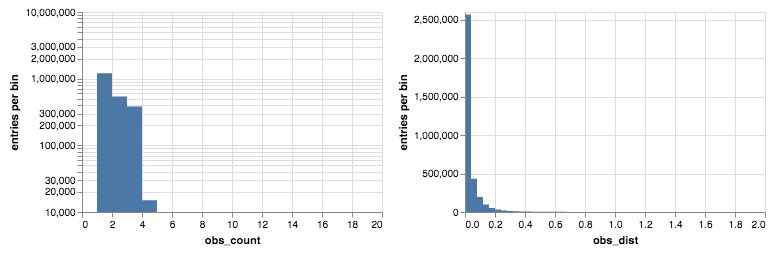

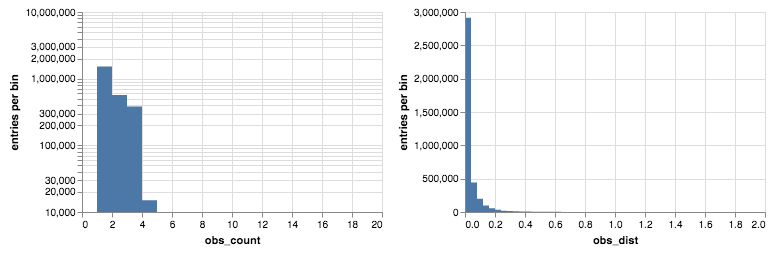

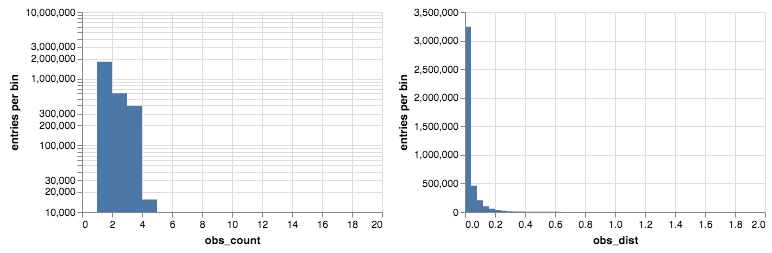

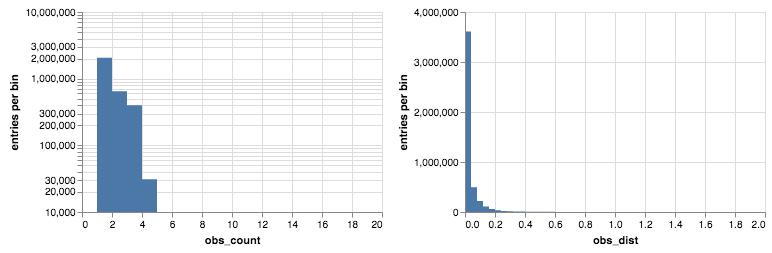

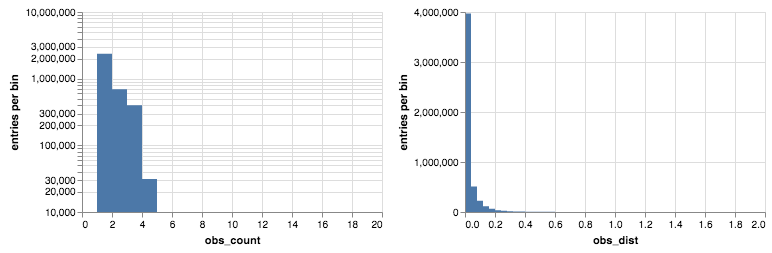

2.083762 million events/second


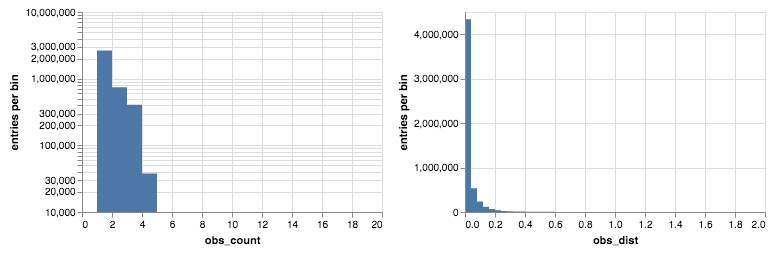

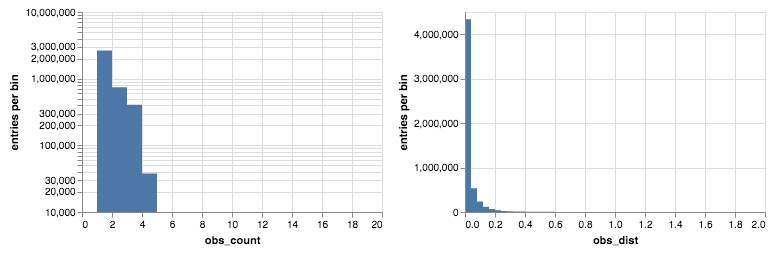

In [16]:
session = Session(job_server)

h_nobs = Hist(hbin("obs_count", 20, 0, 20))
h_dist = Hist(hbin("obs_dist", 50, 0, 2))

disp = beside(
        h_nobs.area("obs_count", width=300, yscale={"type":"log"}),
        h_dist.area("obs_dist", width=300)   #, yscale={"type":"log"})
    )

display = IPythonDisplay(
    disp
)

class MyCallback:
        def on_histograms_update(self, nevents):
            display.update()
            
        def on_exception(self, wid, info):
            print "Error: -----------"
            print info

job = session.createJob("Bliss", user_callback=MyCallback(), use_data_cache=True,
                        histograms = [h_nobs, h_dist])
job.run()
runtime = job.TFinish - job.TStart
nevents = job.EventsProcessed
print "%.6f million events/second" % (nevents/runtime/1000000,)
display.update()



In [35]:
a=np.empty((10,))

In [36]:
a[3:5] = 2
print a

[  6.92492440e-310   6.92492440e-310   0.00000000e+000   2.00000000e+000
   2.00000000e+000   0.00000000e+000   4.44659081e-323   2.54639495e-313
   0.00000000e+000   7.41098469e-323]
